Use the same dataset mpg.csv. Create a histogram for Acceleration using either Matplotlib or Seaborn

* x-axis should be acceleration and y-axis should be count
* The bin count should follow the cubed root of n rule: bins=int(round(df.Acceleration.count()**(1/3), 0)) (Think: what does this code mean?)
* Include the standard deviation, mean, skewness, and kurtosis as text on top of the histogram. (Look at 2.3: Embedded Text)
* Give the histogram a proper title and label axes correctly
* Embed your full name somewhere in the visualization 

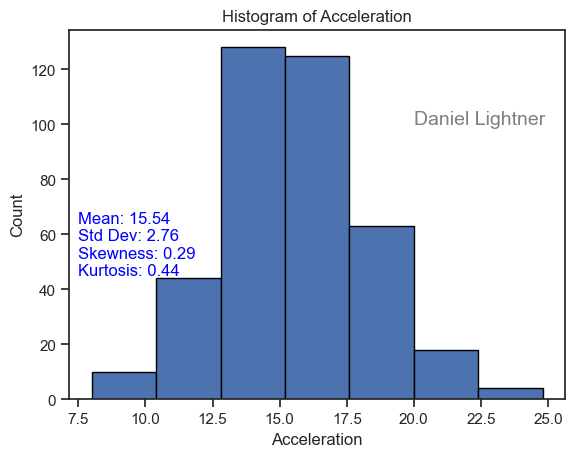

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('mpg.csv')
mean_acceleration = df['Acceleration'].mean()
std_dev_acceleration = df['Acceleration'].std()
skewness_acceleration = df['Acceleration'].skew()
kurtosis_acceleration = df['Acceleration'].kurtosis()
n_bins = int(round(df['Acceleration'].count() ** (1 / 3), 0))

plt.hist(df['Acceleration'], bins=n_bins, edgecolor='black')

plt.text(7.5, 45, f'Mean: {mean_acceleration:.2f}\nStd Dev: {std_dev_acceleration:.2f}\nSkewness: {skewness_acceleration:.2f}\nKurtosis: {kurtosis_acceleration:.2f}', 
         fontsize=12, color='blue')

plt.xlabel('Acceleration')
plt.ylabel('Count')
plt.title('Histogram of Acceleration')
plt.text(20, 100, 'Daniel Lightner', fontsize=14, color='gray')
plt.show()


Create a stacked plot (histogram with a boxplot) using the Seaborn package

* Import the correct libraries you will need seaborn, pandas and pyplot (from matplotlib)
* You should create a boxplot that has cylinders as the x-axis and acceleration as the y-axis. Adjust sizes so that it looks clean and readable.
* Build a histogram for Acceleration that is divided by different numbers of Cylinders, but only inlcude cars with 4 and 8 cylinders.
  * HINT: consider using the orient="" parameter of the Seaborn .boxplot() object to make this look right. See documentation: https://seaborn.pydata.org/generated/seaborn.boxplot.html
* Embed your full name somewhere in the visualization


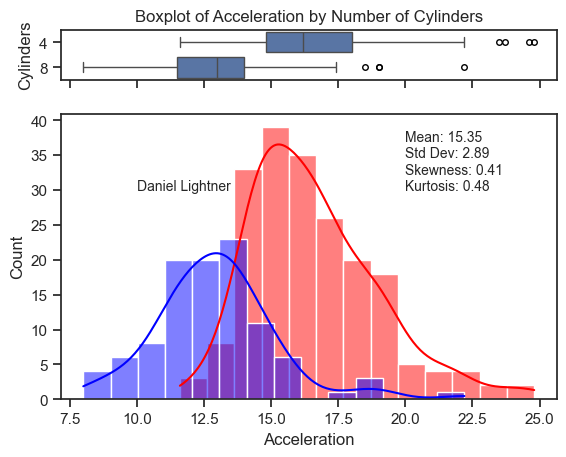

In [63]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('mpg.csv')
df1 = df[df['Cylinders'] == 4] 
df2 = df[df['Cylinders'] == 8]
combined_df = pd.concat([df1, df2], axis=0)
df = combined_df

mean_acceleration = df['Acceleration'].mean()
std_dev_acceleration = df['Acceleration'].std()
skewness_acceleration = df['Acceleration'].skew()
kurtosis_acceleration = df['Acceleration'].kurtosis()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.set(style="ticks")


flierprops = dict(marker='o', markersize=4, markerfacecolor='none', linestyle='none', markeredgecolor='black')


sns.boxplot(data=combined_df, x="Acceleration", y="Cylinders", ax=ax_box, flierprops=flierprops, orient="h")
ax_box.set_title('Boxplot of Acceleration by Number of Cylinders') 
sns.histplot(data=df1, x="Acceleration", ax=ax_hist, kde=True, color="red", label='4 cylinders')
sns.histplot(data=df2, x="Acceleration", ax=ax_hist, kde=True, color="blue", label='8 cylinders')


plt.text(20, 30, f'Mean: {mean_acceleration:.2f}\nStd Dev: {std_dev_acceleration:.2f}\nSkewness: {skewness_acceleration:.2f}\nKurtosis: {kurtosis_acceleration:.2f}', fontsize=10)
plt.text(10, 30, 'Daniel Lightner', fontsize=10)
plt.show()

